In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.style.use('seaborn')

In [17]:
dfx=pd.read_csv('./Training Data/Logistic_X_Train.csv')
dfy=pd.read_csv('./Training Data/Logistic_Y_Train.csv')

In [18]:
x_train=dfx[['f1','f2','f3']]
x_train=x_train.values
y_train=dfy.values.reshape((-1,))
print(x_train.shape,y_train.shape)

(3000, 3) (3000,)


In [19]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [20]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

In [21]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
        return err/x.shape[0]    #Absolute Error

In [32]:
def gradient(x,y,w,b):
    grad_w=np.zeros(x.shape[1])
    grad_b=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y[i]-hx)*x[i]
        grad_b+=(y[i]-hx)
    return [grad_w/x.shape[0],grad_b/x.shape[0]]

In [23]:
def gradientAscent(x,y,lrate=1):
    err_list=[]
    w=np.random.random((x.shape[1],))
    b=np.random.random()
    itr=0
    max_itr=100
    while(itr<=max_itr):
        [grad_w,grad_b]=gradient(x,y,w,b)
        e=error(x,y,w,b)
        w+=lrate*grad_w
        b+=lrate*grad_b
        err_list.append(e)
        itr+=1
    return w,b,err_list

In [24]:
def predict(x,w,b):    
    y_pred = []
    for i in range(x.shape[0]):
        confidence=hypothesis(x[i],w,b)
        if confidence<0.5:
            p=0
        else:
            p=1
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    return y_pred

In [25]:
w,b,err_list=gradientAscent(x_train,y_train)

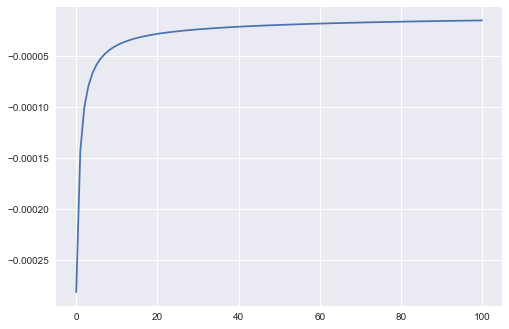

In [30]:
plt.plot(err_list)

In [27]:
x_test=pd.read_csv('Testing Data/Logistic_X_Test.csv')
x_test=x_test[['f1','f2','f3']].values
y_pred=predict(x_test,w,b)

In [37]:
print(y_pred)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 

TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 576x396 with 0 Axes>